In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#한글 위한 글씨체 다운
!apt-get update -qq
!apt-get install fonts-nanum* -qq

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 59 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 31 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [ ]:
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/trutype/nanum/NanumGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumGothic')

In [ ]:
#구글 드라이브 마운트
from google.colab import drive 
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [ ]:
#경로이동
%cd gdrive/MyDrive

/content/gdrive/MyDrive


In [ ]:
localurl='2020_7_2.csv' #강남 2020년 7월 데이터
localurl_9='2020_9.csv' #강남 2020년 9월 데이터
localurl_10='2020_10.csv' #강남 2020년 10월 데이터
try:
  df=pd.read_csv(localurl)
  df_10=pd.read_csv(localurl_10)
  df_9=pd.read_csv(localurl_9)
except OSError as err:
  print("error", format(err))#오류시 에러메시지

In [ ]:
df_10.shape

(875, 12)

In [ ]:
df.shape

(1372, 12)

In [ ]:
df_9.shape

(894, 12)

강남 2020년 7월 분석 시작

In [ ]:
#원룸등은 제외하기 위해서 전용면적 100 이상으로 제한을 둠
df_area=df[df['전용면적']>=100]
df_area

,건축년도,년,법정동,보증금액,아파트,월,월세금액,일,전용면적,지번,지역코드,층
3,2010,2020,역삼동,"140,000",래미안그레이튼(진달래2차),7,0,2,121.5400,762-3,11680,32
9,2007,2020,역삼동,"100,000",래미안펜타빌,7,200,3,157.3700,713-7,11680,2
13,2006,2020,역삼동,"175,000",개나리 푸르지오,7,0,4,148.8017,755-1,11680,21
15,2006,2020,역삼동,"132,000",역삼 I'PARK,7,0,4,130.1560,713-11,11680,3
44,2001,2020,역삼동,"140,000",현대까르띠에710,7,0,11,149.7000,710,11680,8
...,...,...,...,...,...,...,...,...,...,...,...,...
1360,2002,2020,도곡동,"90,000",타워팰리스1,7,350,30,174.6700,467,11680,41
1361,2006,2020,도곡동,"125,000",도곡렉슬,7,120,30,119.8906,527,11680,24
1362,1999,2020,도곡동,"20,000",대림아크로빌,7,320,30,146.7540,467-6,11680,4
1364,2006,2020,도곡동,"140,000",도곡2차 I-PARK,7,0,30,198.1300,969,11680,4


In [ ]:
df_area.shape

(382, 12)

In [ ]:
#전용면적의 type 확인
type('전용면적')

str

In [ ]:
#월세금액의 type 확인
type('월세금액')

str

In [ ]:
#월세금액을 int형으로 바꾸기 위해서 콤마 지우기
df_area['월세금액']=df_area['월세금액'].str.replace(',','')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
#월세금액을 int형으로 변환
df_area['월세금액']=pd.to_numeric(df_area['월세금액'])
df_area

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,건축년도,년,법정동,보증금액,아파트,월,월세금액,일,전용면적,지번,지역코드,층
3,2010,2020,역삼동,"140,000",래미안그레이튼(진달래2차),7,0,2,121.5400,762-3,11680,32
9,2007,2020,역삼동,"100,000",래미안펜타빌,7,200,3,157.3700,713-7,11680,2
13,2006,2020,역삼동,"175,000",개나리 푸르지오,7,0,4,148.8017,755-1,11680,21
15,2006,2020,역삼동,"132,000",역삼 I'PARK,7,0,4,130.1560,713-11,11680,3
44,2001,2020,역삼동,"140,000",현대까르띠에710,7,0,11,149.7000,710,11680,8
...,...,...,...,...,...,...,...,...,...,...,...,...
1360,2002,2020,도곡동,"90,000",타워팰리스1,7,350,30,174.6700,467,11680,41
1361,2006,2020,도곡동,"125,000",도곡렉슬,7,120,30,119.8906,527,11680,24
1362,1999,2020,도곡동,"20,000",대림아크로빌,7,320,30,146.7540,467-6,11680,4
1364,2006,2020,도곡동,"140,000",도곡2차 I-PARK,7,0,30,198.1300,969,11680,4


In [ ]:
#월세금액 자료형 다시 확인
df_area['월세금액'].dtypes

dtype('int64')

In [ ]:
#보증금액을 int형으로 바꾸기 위해서 콤마 지우기
df_area['보증금액']=df_area['보증금액'].str.replace(',','')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
#보증금액 int형으로 변환
df_area['보증금액']=pd.to_numeric(df_area['보증금액'])
df_area

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,건축년도,년,법정동,보증금액,아파트,월,월세금액,일,전용면적,지번,지역코드,층
3,2010,2020,역삼동,140000,래미안그레이튼(진달래2차),7,0,2,121.5400,762-3,11680,32
9,2007,2020,역삼동,100000,래미안펜타빌,7,200,3,157.3700,713-7,11680,2
13,2006,2020,역삼동,175000,개나리 푸르지오,7,0,4,148.8017,755-1,11680,21
15,2006,2020,역삼동,132000,역삼 I'PARK,7,0,4,130.1560,713-11,11680,3
44,2001,2020,역삼동,140000,현대까르띠에710,7,0,11,149.7000,710,11680,8
...,...,...,...,...,...,...,...,...,...,...,...,...
1360,2002,2020,도곡동,90000,타워팰리스1,7,350,30,174.6700,467,11680,41
1361,2006,2020,도곡동,125000,도곡렉슬,7,120,30,119.8906,527,11680,24
1362,1999,2020,도곡동,20000,대림아크로빌,7,320,30,146.7540,467-6,11680,4
1364,2006,2020,도곡동,140000,도곡2차 I-PARK,7,0,30,198.1300,969,11680,4


In [ ]:
#보증금액 자료형 다시 확인
df_area['보증금액'].dtypes

dtype('int64')

In [ ]:
#보증금액(전세)을 알아보기 위해서 월세금액이 0인 행들만 모음
df_area=df_area[df_area['월세금액']==0]
df_area

,건축년도,년,법정동,보증금액,아파트,월,월세금액,일,전용면적,지번,지역코드,층
3,2010,2020,역삼동,140000,래미안그레이튼(진달래2차),7,0,2,121.5400,762-3,11680,32
13,2006,2020,역삼동,175000,개나리 푸르지오,7,0,4,148.8017,755-1,11680,21
15,2006,2020,역삼동,132000,역삼 I'PARK,7,0,4,130.1560,713-11,11680,3
44,2001,2020,역삼동,140000,현대까르띠에710,7,0,11,149.7000,710,11680,8
51,2007,2020,역삼동,130000,롯데캐슬노블,7,0,12,176.0300,835-68,11680,13
...,...,...,...,...,...,...,...,...,...,...,...,...
1347,2002,2020,도곡동,140000,타워팰리스1,7,0,27,120.7800,467,11680,30
1348,2006,2020,도곡동,160000,도곡렉슬,7,0,28,119.8906,527,11680,25
1356,1995,2020,도곡동,115000,럭키(963),7,0,29,124.1000,963,11680,12
1364,2006,2020,도곡동,140000,도곡2차 I-PARK,7,0,30,198.1300,969,11680,4


In [ ]:
df_area=df_area.sort_values(by=['전용면적'], axis=0, ascending=True)

In [ ]:
#다른 달과 분석할 데이터 개수 통일 하기 위해서 131개 탈락시킴
df_area=df_area[:-131]

In [ ]:
df_area

,건축년도,년,법정동,보증금액,아파트,월,월세금액,일,전용면적,지번,지역코드,층
898,1979,2020,압구정동,75000,한양5,7,0,25,100.5000,513,11680,4
813,2003,2020,논현동,50000,더그레이스,7,0,31,100.5300,212-20,11680,5
375,2005,2020,삼성동,90000,레미안삼성1차(104),7,0,2,101.3400,104-10,11680,7
976,2014,2020,자곡동,76000,강남한양수자인(4단지),7,0,8,101.5100,BL-4,11680,4
992,2014,2020,자곡동,75000,강남한양수자인(4단지),7,0,24,101.5100,BL-4,11680,6
...,...,...,...,...,...,...,...,...,...,...,...,...
1273,2006,2020,도곡동,150000,도곡렉슬,7,0,14,120.8233,527,11680,25
1277,2006,2020,도곡동,165000,도곡렉슬,7,0,15,120.8233,527,11680,19
711,2008,2020,대치동,143000,롯데캐슬리베,7,0,28,121.0894,1025,11680,10
733,2008,2020,대치동,170000,롯데캐슬리베,7,0,30,121.0894,1025,11680,6


In [ ]:
#강남 7월 전세 평균
df_mean=df_area[['보증금액','월세금액','전용면적']]
df_mean.mean()

보증금액    98550.000000
월세금액        0.000000
전용면적      109.841595
dtype: float64

강남 2020년 10월 분석 시작

In [ ]:
df_area_10=df_10[df_10['전용면적']>=100]
df_area_10

,건축년도,년,법정동,보증금액,아파트,월,월세금액,일,전용면적,지번,지역코드,층
0,2007,2020,역삼동,"160,000",래미안펜타빌,10,0,1,157.3700,713-7,11680,3
6,2006,2020,역삼동,"122,800",개나리래미안,10,0,6,129.9600,754,11680,3
32,2016,2020,역삼동,"130,200",역삼자이,10,0,10,114.5958,711-3,11680,13
33,2016,2020,역삼동,"125,000",역삼자이,10,30,10,114.5958,711-3,11680,15
40,2006,2020,역삼동,"50,000",개나리래미안,10,220,13,114.6500,754,11680,10
...,...,...,...,...,...,...,...,...,...,...,...,...
854,2002,2020,도곡동,"200,000",타워팰리스1,10,0,28,137.2400,467,11680,14
858,1983,2020,도곡동,"33,600",삼익,10,74,29,104.0100,869,11680,13
859,2006,2020,도곡동,"210,000",도곡렉슬,10,0,29,138.3156,527,11680,20
860,2004,2020,도곡동,"165,000",아카데미스위트1,10,0,29,164.8700,467-7,11680,30


In [ ]:
#월세금액 자료형 확인
df_area_10['월세금액'].dtypes

dtype('O')

In [ ]:
#int형으로 바꾸기 위해서 콤마 지우기
df_area_10['월세금액']=df_area_10['월세금액'].str.replace(',','')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
#월세금액을 int형으로 변환
df_area_10['월세금액']=pd.to_numeric(df_area_10['월세금액'])
df_area_10

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,건축년도,년,법정동,보증금액,아파트,월,월세금액,일,전용면적,지번,지역코드,층
0,2007,2020,역삼동,"160,000",래미안펜타빌,10,0,1,157.3700,713-7,11680,3
6,2006,2020,역삼동,"122,800",개나리래미안,10,0,6,129.9600,754,11680,3
32,2016,2020,역삼동,"130,200",역삼자이,10,0,10,114.5958,711-3,11680,13
33,2016,2020,역삼동,"125,000",역삼자이,10,30,10,114.5958,711-3,11680,15
40,2006,2020,역삼동,"50,000",개나리래미안,10,220,13,114.6500,754,11680,10
...,...,...,...,...,...,...,...,...,...,...,...,...
854,2002,2020,도곡동,"200,000",타워팰리스1,10,0,28,137.2400,467,11680,14
858,1983,2020,도곡동,"33,600",삼익,10,74,29,104.0100,869,11680,13
859,2006,2020,도곡동,"210,000",도곡렉슬,10,0,29,138.3156,527,11680,20
860,2004,2020,도곡동,"165,000",아카데미스위트1,10,0,29,164.8700,467-7,11680,30


In [ ]:
#월세금액 자료형 다시 확인
df_area_10['월세금액'].dtypes

dtype('int64')

In [ ]:
#보증금액을 int형으로 바꾸기 위해서 콤마 지우기
df_area_10['보증금액']=df_area_10['보증금액'].str.replace(',','')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
#보증금액 int형으로 변환
df_area_10['보증금액']=pd.to_numeric(df_area_10['보증금액'])
df_area_10

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,건축년도,년,법정동,보증금액,아파트,월,월세금액,일,전용면적,지번,지역코드,층
0,2007,2020,역삼동,160000,래미안펜타빌,10,0,1,157.3700,713-7,11680,3
6,2006,2020,역삼동,122800,개나리래미안,10,0,6,129.9600,754,11680,3
32,2016,2020,역삼동,130200,역삼자이,10,0,10,114.5958,711-3,11680,13
33,2016,2020,역삼동,125000,역삼자이,10,30,10,114.5958,711-3,11680,15
40,2006,2020,역삼동,50000,개나리래미안,10,220,13,114.6500,754,11680,10
...,...,...,...,...,...,...,...,...,...,...,...,...
854,2002,2020,도곡동,200000,타워팰리스1,10,0,28,137.2400,467,11680,14
858,1983,2020,도곡동,33600,삼익,10,74,29,104.0100,869,11680,13
859,2006,2020,도곡동,210000,도곡렉슬,10,0,29,138.3156,527,11680,20
860,2004,2020,도곡동,165000,아카데미스위트1,10,0,29,164.8700,467-7,11680,30


In [ ]:
#보증금액 자료형 확인
df_area_10['보증금액'].dtypes

dtype('int64')

In [ ]:
#보증금액(전세)을 알아보기 위해서 월세금액이 0인 행들만 모음
df_area_10=df_area_10[df_area_10['월세금액']==0]
df_area_10

,건축년도,년,법정동,보증금액,아파트,월,월세금액,일,전용면적,지번,지역코드,층
0,2007,2020,역삼동,160000,래미안펜타빌,10,0,1,157.3700,713-7,11680,3
6,2006,2020,역삼동,122800,개나리래미안,10,0,6,129.9600,754,11680,3
32,2016,2020,역삼동,130200,역삼자이,10,0,10,114.5958,711-3,11680,13
44,2010,2020,역삼동,170000,래미안그레이튼(진달래2차),10,0,14,120.3700,762-3,11680,26
46,2006,2020,역삼동,141000,역삼 I'PARK,10,0,14,144.4310,713-11,11680,4
...,...,...,...,...,...,...,...,...,...,...,...,...
836,1985,2020,도곡동,120000,우성4,10,0,23,126.4600,465,11680,9
854,2002,2020,도곡동,200000,타워팰리스1,10,0,28,137.2400,467,11680,14
859,2006,2020,도곡동,210000,도곡렉슬,10,0,29,138.3156,527,11680,20
860,2004,2020,도곡동,165000,아카데미스위트1,10,0,29,164.8700,467-7,11680,30


In [ ]:
#보증금액의 평균
df_mean_10=df_area_10[['보증금액','월세금액','전용면적']]
df_mean_10.mean()

보증금액    117180.384615
월세금액         0.000000
전용면적       131.481553
dtype: float64

강남 2020년 9월 분석 시작

In [ ]:
df_area_9=df_9[df_9['전용면적']>=100]
df_area_9

,건축년도,년,법정동,보증금액,아파트,월,월세금액,일,전용면적,지번,지역코드,층
1,2006,2020,역삼동,"50,000",개나리래미안,9,330,1,144.5500,754,11680,12
27,2016,2020,역삼동,"70,000",역삼자이,9,350,10,114.0190,711-3,11680,9
29,2012,2020,역삼동,"88,000",개나리SK뷰,9,200,10,127.2700,716-3,11680,24
46,2006,2020,역삼동,"130,000",개나리 푸르지오,9,40,15,148.8017,755-1,11680,9
54,1998,2020,역삼동,"20,000",세종빌라트,9,150,17,122.4500,791-23,11680,2
...,...,...,...,...,...,...,...,...,...,...,...,...
882,1998,2020,도곡동,"175,000",현대파크빌라,9,0,28,228.6300,192-2,11680,4
883,2007,2020,도곡동,"80,000",도곡1차아이파크,9,165,28,130.2590,543-7,11680,18
884,1988,2020,도곡동,"100,000",한신엠비씨,9,0,28,117.5700,895-8,11680,5
889,1998,2020,도곡동,"70,000",우성캐릭터빌,9,350,29,167.7400,467-18,11680,13


In [ ]:
#int형으로 바꾸기 위해서 콤마 지우기
df_area_9['월세금액']=df_area_9['월세금액'].str.replace(',','')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
#월세금액을 int형으로 변환
df_area_9['월세금액']=pd.to_numeric(df_area_9['월세금액'])
df_area_9

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,건축년도,년,법정동,보증금액,아파트,월,월세금액,일,전용면적,지번,지역코드,층
1,2006,2020,역삼동,"50,000",개나리래미안,9,330,1,144.5500,754,11680,12
27,2016,2020,역삼동,"70,000",역삼자이,9,350,10,114.0190,711-3,11680,9
29,2012,2020,역삼동,"88,000",개나리SK뷰,9,200,10,127.2700,716-3,11680,24
46,2006,2020,역삼동,"130,000",개나리 푸르지오,9,40,15,148.8017,755-1,11680,9
54,1998,2020,역삼동,"20,000",세종빌라트,9,150,17,122.4500,791-23,11680,2
...,...,...,...,...,...,...,...,...,...,...,...,...
882,1998,2020,도곡동,"175,000",현대파크빌라,9,0,28,228.6300,192-2,11680,4
883,2007,2020,도곡동,"80,000",도곡1차아이파크,9,165,28,130.2590,543-7,11680,18
884,1988,2020,도곡동,"100,000",한신엠비씨,9,0,28,117.5700,895-8,11680,5
889,1998,2020,도곡동,"70,000",우성캐릭터빌,9,350,29,167.7400,467-18,11680,13


In [ ]:
#월세금액 자료형 다시 확인
df_area_9['월세금액'].dtypes

dtype('int64')

In [ ]:
#보증금액을 int형으로 바꾸기 위해서 콤마 지우기
df_area_9['보증금액']=df_area_9['보증금액'].str.replace(',','')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
#보증금액 int형으로 변환
df_area_9['보증금액']=pd.to_numeric(df_area_9['보증금액'])
df_area_9

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,건축년도,년,법정동,보증금액,아파트,월,월세금액,일,전용면적,지번,지역코드,층
1,2006,2020,역삼동,50000,개나리래미안,9,330,1,144.5500,754,11680,12
27,2016,2020,역삼동,70000,역삼자이,9,350,10,114.0190,711-3,11680,9
29,2012,2020,역삼동,88000,개나리SK뷰,9,200,10,127.2700,716-3,11680,24
46,2006,2020,역삼동,130000,개나리 푸르지오,9,40,15,148.8017,755-1,11680,9
54,1998,2020,역삼동,20000,세종빌라트,9,150,17,122.4500,791-23,11680,2
...,...,...,...,...,...,...,...,...,...,...,...,...
882,1998,2020,도곡동,175000,현대파크빌라,9,0,28,228.6300,192-2,11680,4
883,2007,2020,도곡동,80000,도곡1차아이파크,9,165,28,130.2590,543-7,11680,18
884,1988,2020,도곡동,100000,한신엠비씨,9,0,28,117.5700,895-8,11680,5
889,1998,2020,도곡동,70000,우성캐릭터빌,9,350,29,167.7400,467-18,11680,13


In [ ]:
#보증금액 자료형 확인
df_area_9['보증금액'].dtypes

dtype('int64')

In [ ]:
#보증금액(전세)을 알아보기 위해서 월세금액이 0인 행들만 모음
df_area_9=df_area_9[df_area_9['월세금액']==0]
df_area_9

,건축년도,년,법정동,보증금액,아파트,월,월세금액,일,전용면적,지번,지역코드,층
105,2007,2020,역삼동,160000,래미안펜타빌,9,0,29,158.58,713-7,11680,24
111,1984,2020,개포동,110000,현대1차101동~106동,9,0,1,128.62,653,11680,1
123,1986,2020,개포동,110000,현대2,9,0,5,165.08,654,11680,2
134,1984,2020,개포동,68250,개포우성3차,9,0,8,104.43,652,11680,9
159,1986,2020,개포동,130000,현대3,9,0,16,163.85,177,11680,5
...,...,...,...,...,...,...,...,...,...,...,...,...
861,2003,2020,도곡동,160000,타워팰리스2,9,0,23,115.63,467-17,11680,27
863,2003,2020,도곡동,160000,타워팰리스2,9,0,23,115.63,467-17,11680,27
874,1985,2020,도곡동,94500,우성4,9,0,26,152.74,465,11680,9
882,1998,2020,도곡동,175000,현대파크빌라,9,0,28,228.63,192-2,11680,4


In [ ]:
df_area_9=df_area_9.sort_values(by=['전용면적'], axis=0, ascending=True)

In [ ]:
#정렬확인
df_area_9

,건축년도,년,법정동,보증금액,아파트,월,월세금액,일,전용면적,지번,지역코드,층
608,1978,2020,압구정동,60000,한양4,9,0,28,101.09,486,11680,6
601,1978,2020,압구정동,78000,한양4,9,0,25,101.09,486,11680,12
301,2007,2020,삼성동,135000,롯데캐슬프레미어,9,0,23,101.81,11,11680,15
645,2014,2020,자곡동,95000,래미안강남힐즈,9,0,22,101.94,611,11680,7
659,2014,2020,자곡동,83000,래미안강남힐즈,9,0,28,101.94,611,11680,13
...,...,...,...,...,...,...,...,...,...,...,...,...
227,1994,2020,청담동,160000,흥화빌라,9,0,17,206.85,141-1,11680,3
882,1998,2020,도곡동,175000,현대파크빌라,9,0,28,228.63,192-2,11680,4
298,2012,2020,삼성동,350000,삼성동상지리츠빌카일룸,9,0,22,237.74,65-4,11680,9
215,2000,2020,청담동,142000,연세빌라(59-16),9,0,8,238.16,59-16,11680,8


In [ ]:
#다른 달과과 분석할 데이터 개수 통일 하기 위해서 11개 탈락시킴
df_area_9=df_area_9[:-11]

In [ ]:
df_area_9

,건축년도,년,법정동,보증금액,아파트,월,월세금액,일,전용면적,지번,지역코드,층
608,1978,2020,압구정동,60000,한양4,9,0,28,101.09,486,11680,6
601,1978,2020,압구정동,78000,한양4,9,0,25,101.09,486,11680,12
301,2007,2020,삼성동,135000,롯데캐슬프레미어,9,0,23,101.81,11,11680,15
645,2014,2020,자곡동,95000,래미안강남힐즈,9,0,22,101.94,611,11680,7
659,2014,2020,자곡동,83000,래미안강남힐즈,9,0,28,101.94,611,11680,13
...,...,...,...,...,...,...,...,...,...,...,...,...
809,2002,2020,도곡동,183750,타워팰리스1,9,0,8,164.97,467,11680,33
123,1986,2020,개포동,110000,현대2,9,0,5,165.08,654,11680,2
192,2004,2020,개포동,120750,개포자이(12-2),9,0,25,168.42,12-2,11680,5
234,2002,2020,청담동,135000,상지리츠빌6,9,0,23,168.67,106-1,11680,1


In [ ]:
#보증금액의 평균
df_area_9=df_area_9[['보증금액','월세금액','전용면적']]
df_area_9.mean()

보증금액    110727.692308
월세금액         0.000000
전용면적       127.256378
dtype: float64

Matplotlib 사용하여 그래프 그리기(강남)

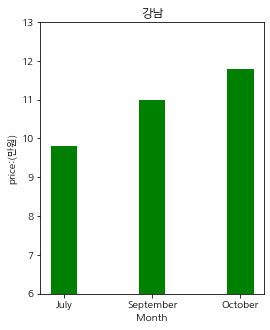

In [ ]:
#한글 안나오면 런타임 다시시작 및 모두실행 하면 한글 다시 됩니다.
plt.figure(figsize=(4,5))
x=['July', 'September', 'October']
y=[9.8,11.0, 11.8]
plt.bar(x,y, width=0.3, color="green")
plt.rc('font', family='NanumGothic')
plt.title('강남')
plt.xlabel("Month")
plt.ylabel("price:(만원)")
axes = plt.gca()
axes.set_ylim([6, 13])
plt.show()